# I. Analysis of the data

In [1]:
# Import of all the modules needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget 

In [55]:
# Functions
my_cmap = plt.get_cmap("plasma")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

def update_annot(bar):
    x = bar.get_x()+bar.get_width()/2.
    y = bar.get_y()+bar.get_height()
    annot.xy = (x,y)
    text = "{} : {:.2f}".format( sales_all_platf.index[x],y )
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        for bar in bars:
            cont, ind = bar.contains(event)
            if cont:
                update_annot(bar)
                annot.set_visible(True)
                fig.canvas.draw_idle()
                return
    if vis:
        annot.set_visible(False)
        fig.canvas.draw_idle()

In [11]:
# Import of the data set
sales = pd.read_csv("vgsales.csv")
print(sales.describe())
print(sales.describe(include = 'object'))
sales

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [32]:
# Group the sales by game name (the sales are for all platforms combined)
sales_all_platf = sales.loc[:,['Name','Global_Sales']].groupby(['Name']).sum().sort_values('Global_Sales',ascending=False)
print(sales_all_platf.index)
platfByGame = sales.loc[:,['Name','Platform']].groupby(['Name'])['Platform'].apply(list)

sales_all_platf.join(platfByGame)

Index(['Wii Sports', 'Grand Theft Auto V', 'Super Mario Bros.', 'Tetris',
       'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue',
       'Call of Duty: Black Ops', 'Call of Duty: Modern Warfare 3',
       'New Super Mario Bros.',
       ...
       'World Heroes Anthology', 'Fuun Shinsengumi Bakumatsuden Portable',
       'Fuuraiki 3', 'Tenchu San Portable',
       'Codename: Panzers Complete Collection', 'Codename: Panzers Phase Two',
       'Tengai Makyo: Dai Yon no Mokushiroku', 'Jewel Quest II',
       'Tenjin Ranman: Happy GO Lucky!!', 'Dark Parables: The Exiled Prince'],
      dtype='object', name='Name', length=11493)


,Global_Sales,Platform
Name,,
Wii Sports,82.74,[Wii]
Grand Theft Auto V,55.92,"[PS3, X360, PS4, XOne, PC]"
Super Mario Bros.,45.31,"[NES, GB]"
Tetris,35.84,"[GB, NES]"
Mario Kart Wii,35.82,[Wii]
...,...,...
Codename: Panzers Phase Two,0.01,[PC]
Tengai Makyo: Dai Yon no Mokushiroku,0.01,[PSP]
Jewel Quest II,0.01,[PC]


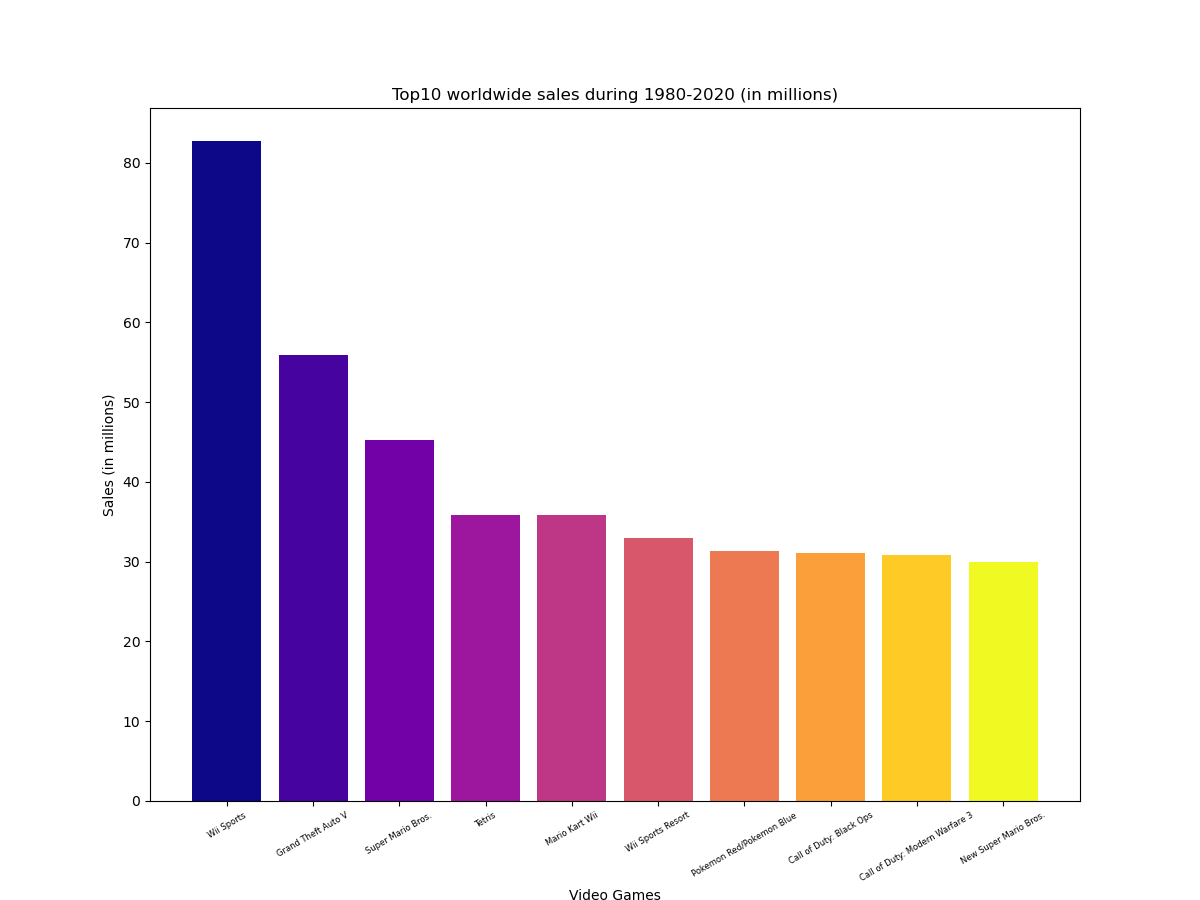

In [71]:
# Number of sales of the top 10 best-selling games (all platforms combined) of the 1980-2020 period
nb_vg = 10

fig = plt.figure(figsize=(12,9))
ax=plt.subplot()
fig.canvas.layout.height = '950px'
bars = plt.bar(np.arange(nb_vg),sales_all_platf.iloc[:nb_vg,0], color = my_cmap(rescale(np.arange(nb_vg))))
plt.xticks(np.arange(nb_vg), sales_all_platf.index[:nb_vg],fontsize=6,rotation=30)
plt.title('Top10 worldwide sales during 1980-2020 (in millions)')
ax.set_ylabel('Sales (in millions)')
ax.set_xlabel('Video Games')

annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="white", ec="b", lw=2),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)
fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

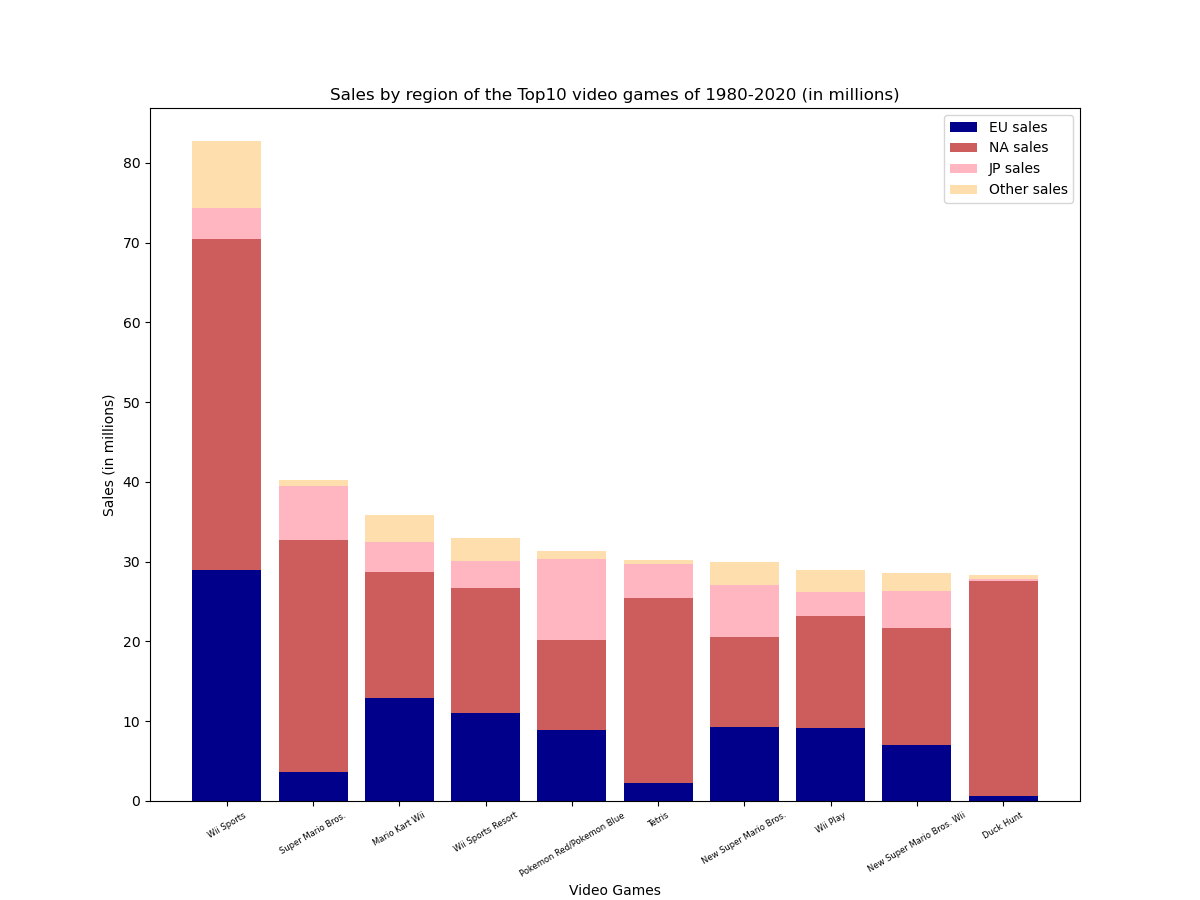

In [70]:
# Number of sales of the top 10 best-selling games by region
labels = sales.iloc[:nb_vg,1]
eu_sales = sales.iloc[:nb_vg,7]
na_sales = sales.iloc[:nb_vg,6]
jp_sales = sales.iloc[:nb_vg,8]
other_sales = sales.iloc[:nb_vg,9]

fig = plt.figure(figsize=(12,9))
ax=plt.subplot()
fig.canvas.layout.height = '950px'
ax.bar(labels, eu_sales, label = 'EU sales', color = 'darkblue')
ax.bar(labels, na_sales, bottom=eu_sales, label='NA sales', color = 'indianred')
ax.bar(labels, jp_sales, bottom=eu_sales+na_sales, label='JP sales', color = 'lightpink')
ax.bar(labels, other_sales, bottom=eu_sales+na_sales+jp_sales, label='Other sales', color = 'navajowhite')
plt.xticks(fontsize=6,rotation=30)

ax.set_ylabel('Sales (in millions)')
ax.set_xlabel('Video Games')
ax.legend()
ax.set_title('Sales by region of the Top10 video games of 1980-2020 (in millions)')

plt.show()

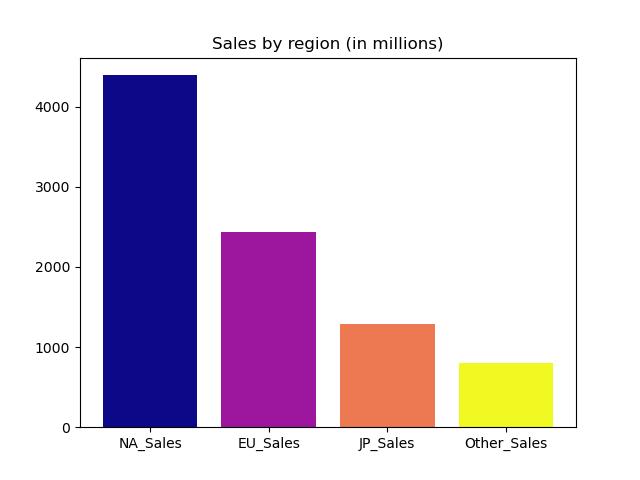

In [5]:
#Number of sales by region
plt.figure()
plt.bar(np.arange(4),sales.iloc[:,6:10].aggregate(sum), color = my_cmap(rescale(np.arange(4))))
plt.xticks(np.arange(4), sales.columns[6:10])
plt.title('Sales by region (in millions)')

plt.show()

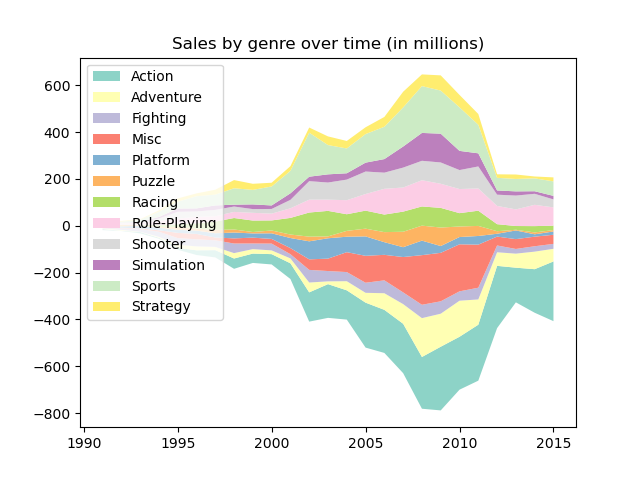

In [6]:
#Number of sales by genre over time
salesByYearGenre = sales.groupby(['Year','Genre']).count().iloc[:,0].unstack()
x = salesByYearGenre.index.values
y = salesByYearGenre.T
my_cmap = plt.get_cmap("Set3")

plt.figure()
plt.stackplot(x,y,baseline="wiggle",labels = salesByYearGenre.columns ,colors = my_cmap(rescale(np.arange(12))))
plt.legend(loc='upper left')
plt.title('Sales by genre over time (in millions)')

plt.show()

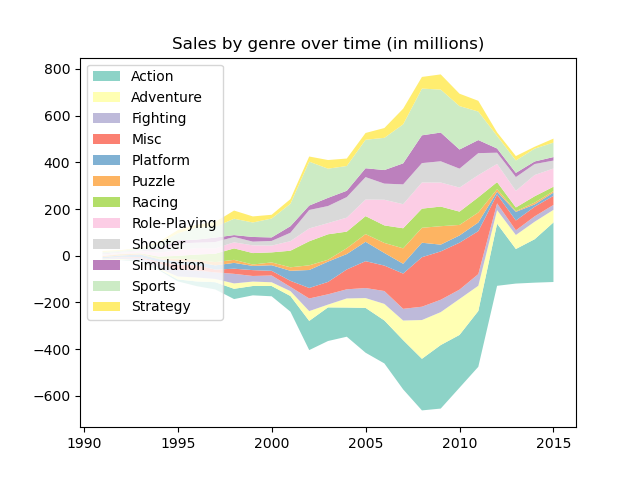

In [7]:
# I remove the years with na values
na_values = salesByYearGenre.isna().sum(axis=1)
salesByYearGenre = salesByYearGenre[na_values == 0]
x = salesByYearGenre.index.values
y = salesByYearGenre.T

plt.figure()
plt.stackplot(x,y,baseline="weighted_wiggle",labels = salesByYearGenre.columns ,colors = my_cmap(rescale(np.arange(12))))
plt.legend(loc='upper left')
plt.title('Sales by genre over time (in millions)')

plt.show()

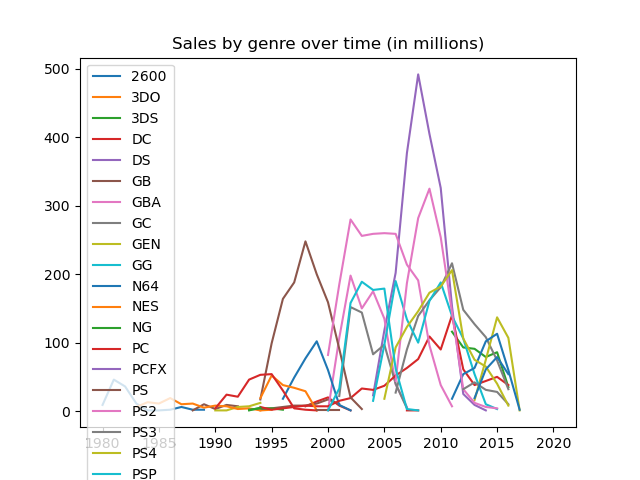

In [8]:
salesByYearPlat = sales.groupby(['Year','Platform']).count().iloc[:,0].unstack()

plt.figure()
plt.plot(salesByYearPlat)
plt.legend(salesByYearPlat.columns, loc='upper left')
plt.title('Sales by genre over time (in millions)')

plt.show()